In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load datasets
deliveries = pd.read_csv('deliveries.csv')
matches    = pd.read_csv('matches.csv')
runs_stats = pd.read_csv('most_runs_average_strikerate.csv')
teams      = pd.read_csv('teams.csv')
teamwise   = pd.read_csv('teamwise_home_and_away.csv')
players    = pd.read_excel('Players.xlsx')

# Standardize team names (e.g. Delhi Daredevils → Delhi Capitals, Pune singular/plural)
name_map = {"Delhi Daredevils": "Delhi Capitals", 
            "Rising Pune Supergiant": "Rising Pune Supergiants",
            "Rising Pune Supergiants": "Rising Pune Supergiants"}
deliveries.replace({"batting_team": name_map, "bowling_team": name_map}, inplace=True)
matches.replace({"team1": name_map, "team2": name_map, 
                 "toss_winner": name_map, "winner": name_map}, inplace=True)
teamwise['team'] = teamwise['team'].replace({"Delhi Daredevils":"Delhi Capitals", 
                                            "Rising Pune Supergiant":"Rising Pune Supergiants"})
# Combine duplicate teamwise rows (due to name change)
teamwise = teamwise.groupby('team', as_index=False).agg({
    'home_wins':'sum','away_wins':'sum','home_matches':'sum','away_matches':'sum'})
teamwise['home_win_pct'] = 100 * teamwise['home_wins']/teamwise['home_matches']
teamwise['away_win_pct'] = 100 * teamwise['away_wins']/teamwise['away_matches']

# Check missing values
print(matches.isnull().sum())
print(deliveries.isnull().sum().sort_values(ascending=False).head(3))


id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64
fielder             172630
player_dismissed    170244
dismissal_kind      170244
dtype: int64


In [4]:
# Top 10 run-scorers overall
top10_batsmen = runs_stats.nlargest(10, 'total_runs')
print(top10_batsmen[['batsman','total_runs','average','strikerate']])


          batsman  total_runs    average  strikerate
0         V Kohli        5426  35.697368  131.987351
1        SK Raina        5386  33.662500  137.538304
2       RG Sharma        4902  30.447205  130.999466
3       DA Warner        4717  41.377193  143.286756
4        S Dhawan        4601  33.583942  125.538881
5        CH Gayle        4525  41.136364  152.254374
6        MS Dhoni        4450  37.711864  138.802246
7      RV Uthappa        4420  28.333333  130.730553
8  AB de Villiers        4414  42.442308  152.101999
9       G Gambhir        4219  31.485075  124.088235


In [5]:
deliveries.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [1]:
# Compute wickets and runs conceded per bowler
#bowl = deliveries[deliveries['dismissal_kind'].notna()]
#wickets = bowl.groupby('bowler')['player_dismissed'].count().reset_index(name='wickets')
#runs_conceded = deliveries.groupby('bowler')['total_runs'].sum().reset_index()
#bowling_stats = pd.merge(wickets, runs_conceded, on='bowler')
#bowling_stats['over'] = deliveries.groupby('bowler').size().values / 6
#bowling_stats['economy'] = bowling_stats['total_runs'] / bowling_stats['over']
#bowling_stats = bowling_stats.sort_values(by='wickets', ascending=False)
#print(bowling_stats.head(5))


In [6]:
# Identify players with both batting runs and wickets
batting_runs = deliveries.groupby('batsman')['batsman_runs'].sum().reset_index(name='runs')
bowler_wkts = deliveries[deliveries.dismissal_kind.notna()].groupby('bowler')['player_dismissed'].count().reset_index(name='wickets')
player_perf = pd.merge(batting_runs, bowler_wkts, left_on='batsman', right_on='bowler', how='outer').fillna(0)
player_perf = player_perf[['batsman','runs','wickets']]
player_perf['performance_score'] = player_perf['runs'] + 20*player_perf['wickets']
print(player_perf.nlargest(10, 'performance_score'))


        batsman    runs  wickets  performance_score
453    SK Raina  5415.0     30.0             6015.0
470   SR Watson  3614.0    107.0             5754.0
519     V Kohli  5434.0      5.0             5534.0
390   RG Sharma  4914.0     16.0             5234.0
99     CH Gayle  4560.0     19.0             4940.0
126    DJ Bravo  1498.0    168.0             4858.0
120   DA Warner  4741.0      0.0             4741.0
415    S Dhawan  4632.0      4.0             4712.0
309    MS Dhoni  4477.0      0.0             4477.0
407  RV Uthappa  4446.0      0.0             4446.0


In [8]:
# Fraction of matches won by toss winners
merged = pd.merge(matches, deliveries[['match_id','inning']].drop_duplicates(), 
                  left_on='id', right_on='match_id', how='left')
total_matches = matches.shape[0]
toss_wins = (matches['toss_winner'] == matches['winner']).sum()
print(f"Toss winner won {toss_wins}/{total_matches} matches ({toss_wins/total_matches:.1%})")


Toss winner won 393/756 matches (52.0%)


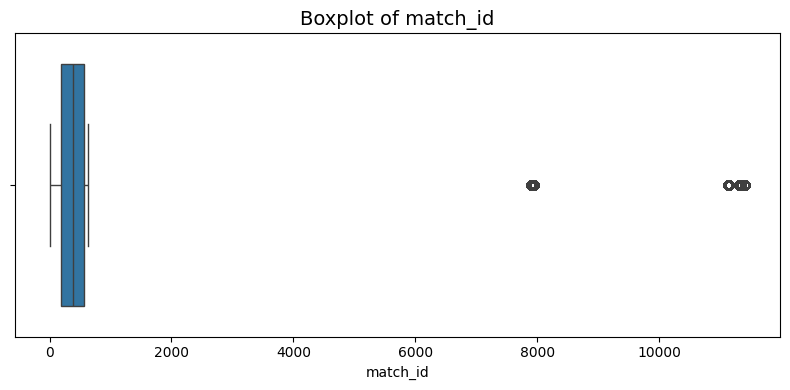

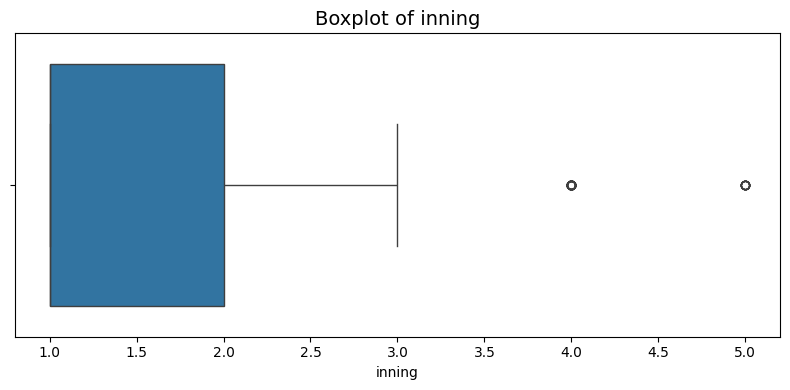

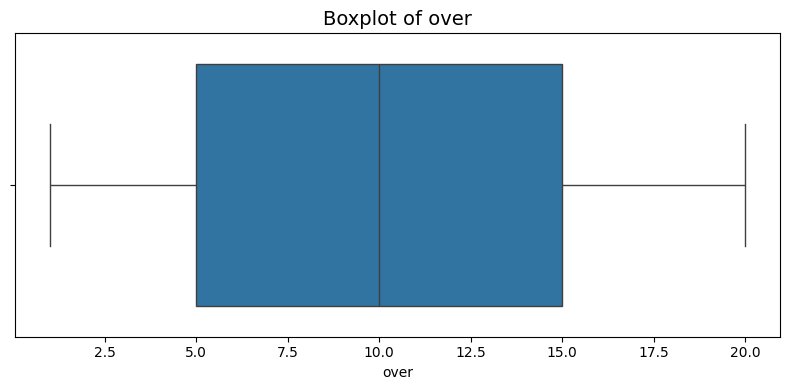

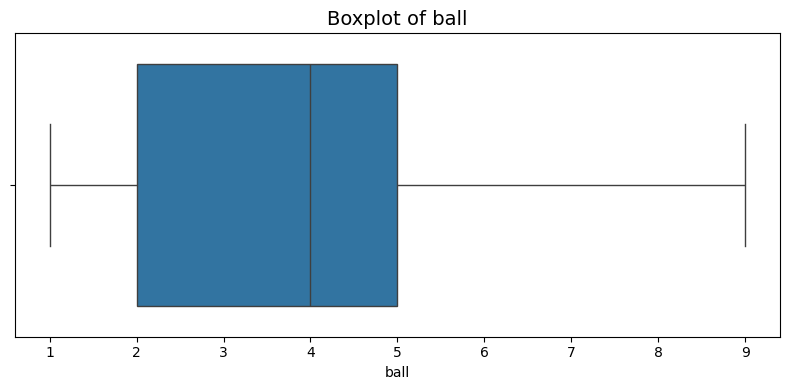

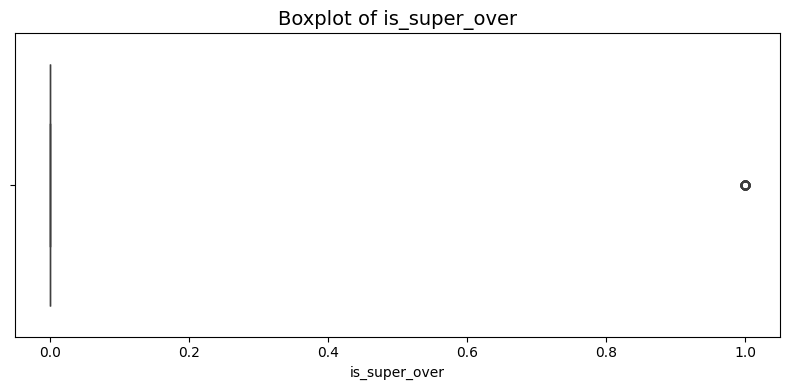

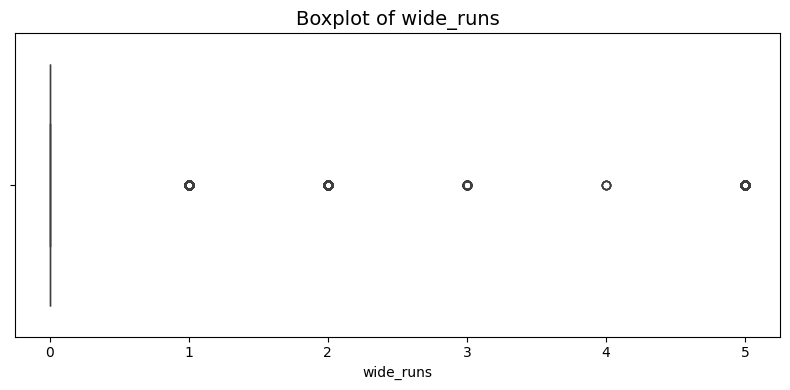

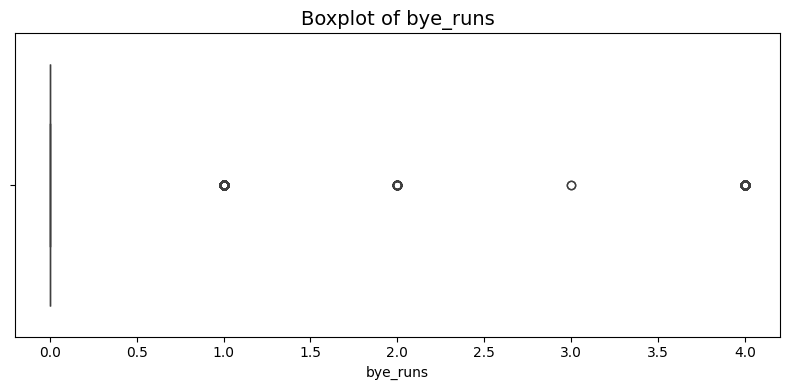

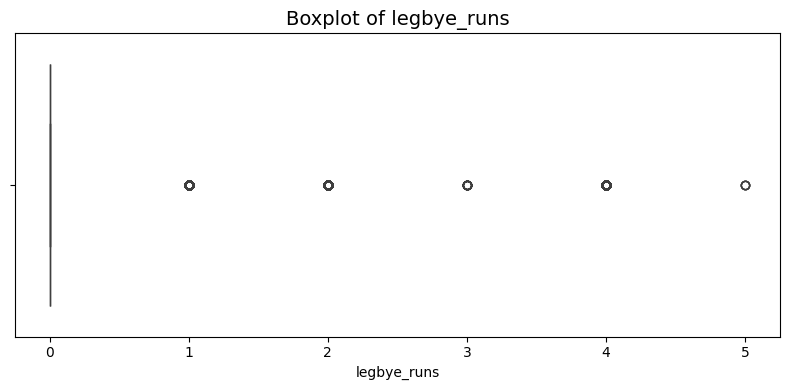

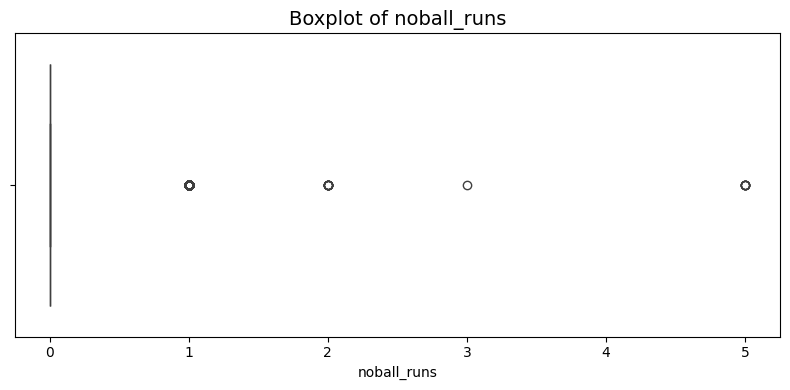

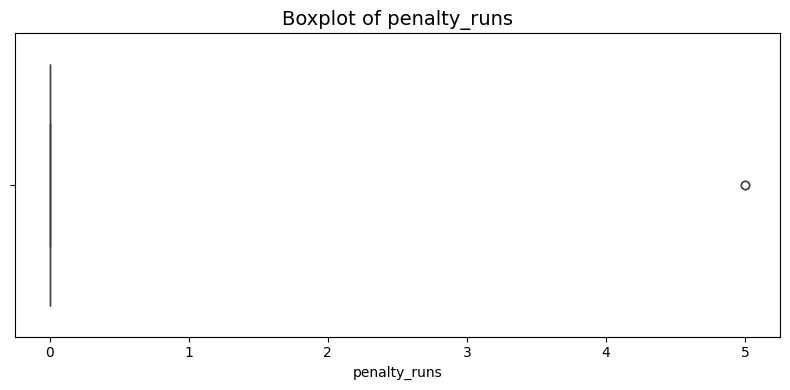

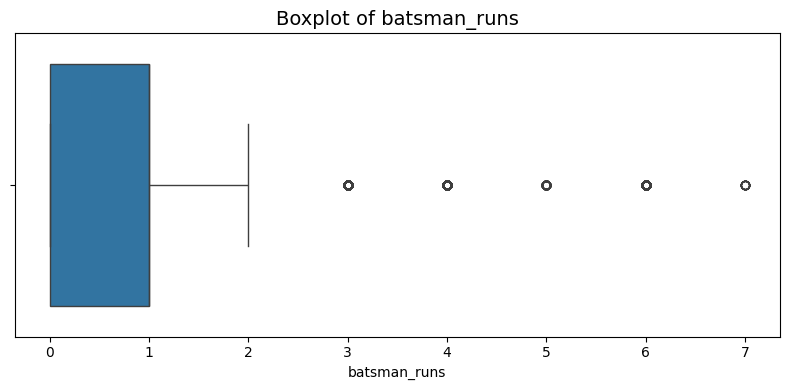

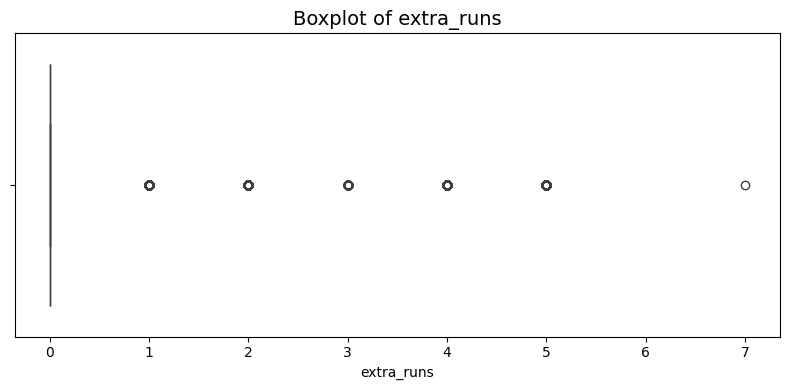

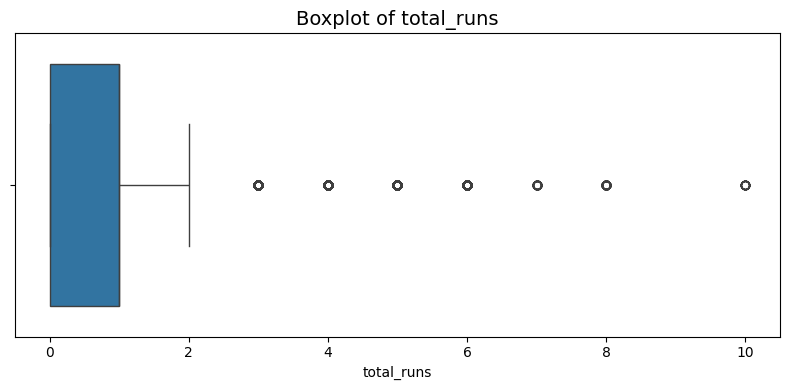

In [8]:
#boxplot for deliveries dataset
df = pd.read_csv("deliveries.csv")  # replace with your CSV file

# Filter only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot each column's boxplot
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


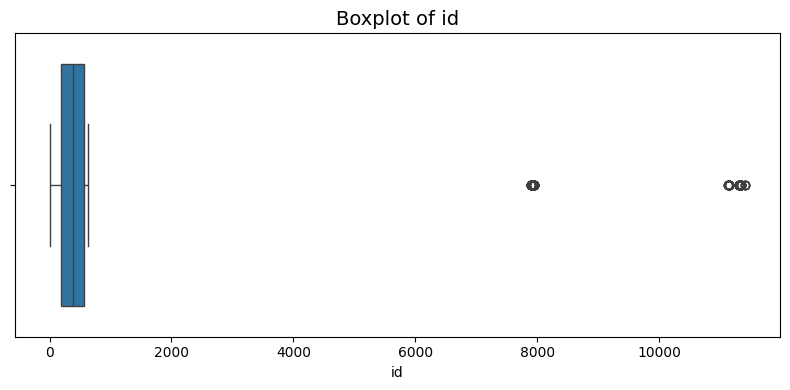

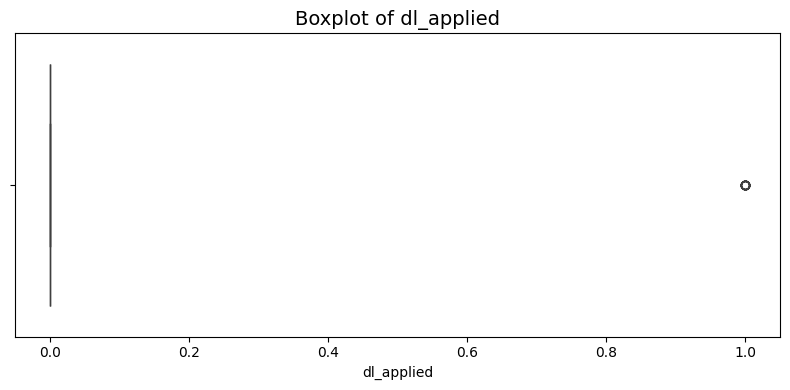

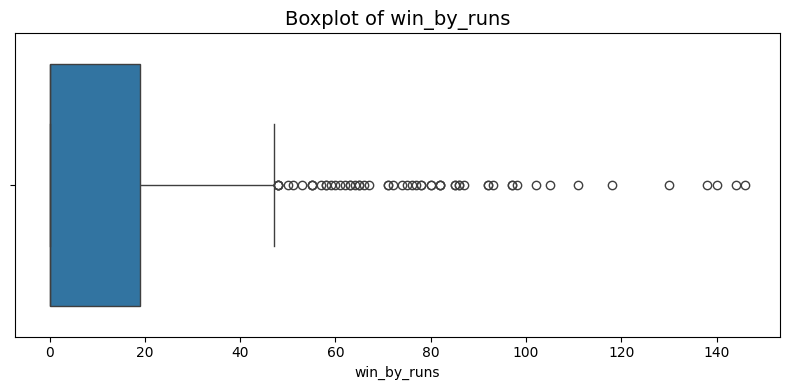

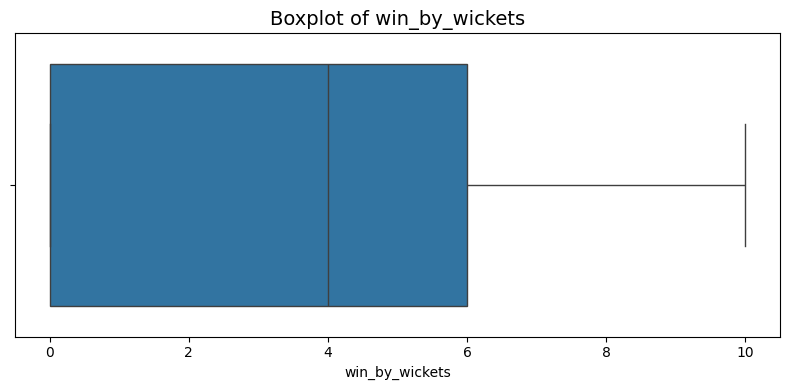

In [9]:
#boxplot for deliveries dataset
df = pd.read_csv("matches.csv")  # replace with your CSV file

# Filter only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot each column's boxplot
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [11]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.05)
df['outlier'] = model.fit_predict(df[['win_by_wickets', 'win_by_runs']])
outliers = df[df['outlier'] == -1]
outliers

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,outlier
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,-1
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN,-1
34,35,IPL-2017,Chandigarh,30-04-2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN,-1
43,44,IPL-2017,Delhi,06-05-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN,-1
59,60,IPL-2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,-1
71,72,IPL-2008,Mumbai,27-04-2008,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN,-1
114,115,IPL-2008,Mumbai,30-05-2008,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen,NaN,-1
119,120,IPL-2009,Cape Town,19-04-2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN,-1
121,122,IPL-2009,Port Elizabeth,20-04-2009,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,92,0,M Muralitharan,St George's Park,BG Jerling,SJA Taufel,NaN,-1
131,132,IPL-2009,Port Elizabeth,27-04-2009,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Mumbai Indians,92,0,SR Tendulkar,St George's Park,BG Jerling,RB Tiffin,NaN,-1
